In [1]:
import os
import pandas as pd
from preprocess import preprocess_transcripts


# * we should extract all folder before
# os.listdir('/Users/pataweeprakrankamanant/Desktop/daic_woz/text/utils_info')


path_dir_load = os.path.join(os.getcwd(), '..','daic_woz', 'text', 'utils_info')
user_ids_list = []
for csv_file in ['train_split_Depression_AVEC2017.csv', 'dev_split_Depression_AVEC2017.csv', 'test_split_Depression_AVEC2017_full.csv']:
    path_load = os.path.join(path_dir_load, csv_file)
    user_ids_list += pd.read_csv(path_load)['Participant_ID'].tolist()

input_dir = 'daic_woz_text_raw'
output_dir = 'daic_woz_cleaned'

preprocess_transcripts(ids = user_ids_list, 
                        output_dir = output_dir, 
                        input_dir = input_dir) 

 74%|███████▎  | 139/189 [00:02<00:01, 47.50it/s]

Error (ID = 451)
Error (ID = 458)


100%|██████████| 189/189 [00:03<00:00, 50.47it/s]

Error (ID = 480)


In [16]:
import os, sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import networkx as nx


path_dir =  os.path.join(os.getcwd(), 'daic_woz_cleaned')
csv_files = sorted([x for x in os.listdir(path_dir) if not x.startswith('.') and x.endswith('_TRANSCRIPT_cleaned.csv')])
path_dir_edge = os.path.join(os.getcwd(), 'daic_woz_edge_graph')

if not os.path.exists(path_dir_edge): os.makedirs(path_dir_edge)

def gen_conv_sentences(df_load, not_printed = True):
    last_speaker = ''
    last_sentence = ''
    
    sentences = []
    for i,r in df_load.iterrows():
        if r['speaker'] == last_speaker:
            last_sentence += ' ' + r['value']
            not_printed = True
        else:
            # print(last_sentence)
            if last_sentence != '':
                sentences.append(last_sentence)
            last_sentence = ''
            last_sentence = r['value']
            not_printed = False
    if not_printed:
        # print(last_sentence)
        sentences.append(last_sentence)
    return sentences

def clean_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    try:
        words = text.lower().split()
    except:
        print(f'text : {text}')
        sys.exit()
    words = [lemmatizer.lemmatize(w) for w in words if not w in stop_words]
    return " ".join(words)

def get_edgesGragh_from_conSentence(cleaned_sentences):
    edges = []
    for i in range(len(cleaned_sentences)-1):
        j = i + 1
        for word1 in cleaned_sentences[i].split():
            for word2 in cleaned_sentences[j].split():
                edges.append((word1,word2))
    return edges

def get_csv_from_edge(edges_list, path_out):
    file = open(path_out,'w', encoding='utf-8')
    for edge in edges_list:
        file.write(edge[0] + ',' + edge[1] + '\n')
    file.close()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pataweeprakrankamanant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pataweeprakrankamanant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pataweeprakrankamanant/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


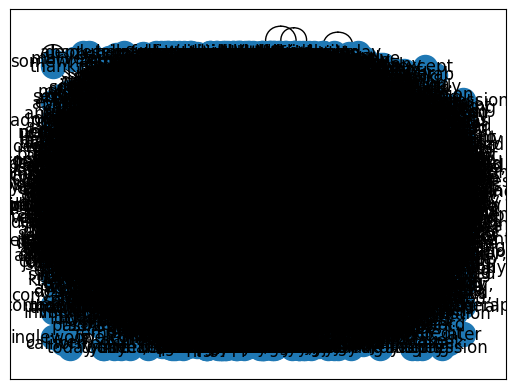

In [17]:
# csv_file_sel = csv_files[0]
path_err_list = []
for csv_file_sel in csv_files:
    path_csv = os.path.join(path_dir, csv_file_sel)
    # print(f'path_csv : {path_csv}')
    df = pd.read_csv(path_csv, delimiter='\t')

    # * fix NAN er 
    df.loc[df['value'].apply(lambda x: not isinstance(x,str)), 'value'] = ''

    # er_not_str = np.sum(df['value'].apply(lambda x: not isinstance(x,str)))
    # if er_not_str > 0:
    #     print(f'csv_file_sel : {csv_file_sel}, Not str : {er_not_str}')
    #     path_err_list.append(path_csv)

    conv_sentence_list = gen_conv_sentences(df)
    conv_sentence_list = [clean_text(s) for s in conv_sentence_list]
    edges_list = get_edgesGragh_from_conSentence(conv_sentence_list)

    G = nx.Graph()
    G.add_edges_from(edges_list)
    nx.draw_networkx(G)

    csv_file_edge_sel = csv_file_sel.replace('.csv', '_edges.csv')
    path_output = os.path.join(path_dir_edge, csv_file_edge_sel)

    get_csv_from_edge(edges_list, path_output)



In [15]:
# for path_err in path_err_list:
#     df = pd.read_csv(path_err, delimiter='\t')
#     df_er = df.loc[df['value'].apply(lambda x: not isinstance(x, str)), :]
#     print(os.path.basename(path_err))
#     print(df_er)
#     print('=='*40)
